In [34]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [35]:
#make_blobs() returns a tuple of two values:
#A two-dimensional NumPy array with the x- and y-values for each of the samples
#A one-dimensional NumPy array containing the cluster labels for each sample
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

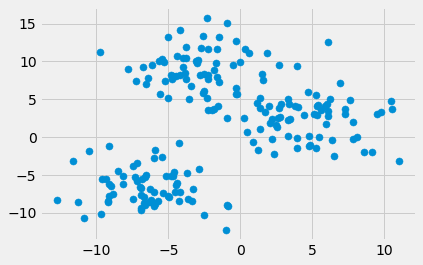

In [36]:
plt.scatter(features[:, 0], features[:, 1], s=50);

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
y_kmeans = kmeans.predict(features)

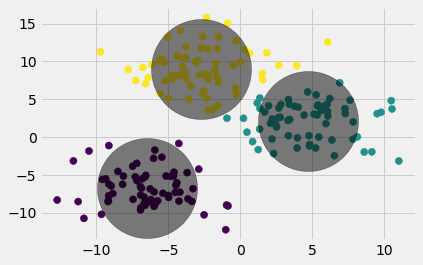

In [38]:
plt.scatter(features[:, 0], features[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=10000, alpha=0.5);

In [40]:
print(f'Silhouette Score(n=3): {silhouette_score(features, y_kmeans)}')      

Silhouette Score(n=3): 0.5917018265925696


In [5]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [6]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [7]:
#Standardization scales, or shifts, the values for each numerical feature in your dataset 
#so that the features have a mean of 0 and standard deviation of 1:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [8]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [9]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [10]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [11]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [12]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

In [13]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

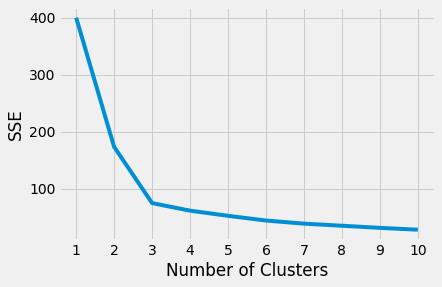

In [14]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [15]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3